In [0]:
import os, warnings
warnings.filterwarnings(action = 'ignore')

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28 * 28

## Encoder making
- 1: n_hidden layer making
- 2: W, B making
- 3: activation function sigmoid

In [0]:
X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

## Decoder making
- input = len(hidden_layer)
- output = len(input)
- decoder(hidden_data) -> out_layer
- 출력값과 입력값을 가장 비슷하게 만든다.

In [0]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input])) # b는 W가 몇 층이든 1개만 있음
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

## cost function, optimizer function

In [0]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

In [13]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
mnist.train.num_examples

55000

In [25]:
total_batch

550

In [26]:
total_cost

14.286454871296883

In [23]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
result = []
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer, cost],
                           feed_dict = {X: batch_xs}) # 비지도 학습이라 Y가 없음
    total_cost += cost_val 

  print('Epoch: {}\tAvg. cost = {}'.format(epoch + 1, total_cost / total_batch))

print('최적화 완료!')

Epoch: 1	Avg. cost = 0.19287504276768727
Epoch: 2	Avg. cost = 0.05386485657231374
Epoch: 3	Avg. cost = 0.04490259778093208
Epoch: 4	Avg. cost = 0.040699598965319723
Epoch: 5	Avg. cost = 0.03768577742305669
Epoch: 6	Avg. cost = 0.035419697886840865
Epoch: 7	Avg. cost = 0.03337236185304143
Epoch: 8	Avg. cost = 0.03240001467141238
Epoch: 9	Avg. cost = 0.031575308137319305
Epoch: 10	Avg. cost = 0.030373359102417122
Epoch: 11	Avg. cost = 0.02981159364973957
Epoch: 12	Avg. cost = 0.029408270113847473
Epoch: 13	Avg. cost = 0.029130626188760455
Epoch: 14	Avg. cost = 0.028793741776184604
Epoch: 15	Avg. cost = 0.027449423301626336
Epoch: 16	Avg. cost = 0.026741297810592434
Epoch: 17	Avg. cost = 0.026542701968415218
Epoch: 18	Avg. cost = 0.026222708916122262
Epoch: 19	Avg. cost = 0.026111235456033187
Epoch: 20	Avg. cost = 0.02597537249326706
최적화 완료!


In [28]:
sample_size = 10
samples = sess.run(decoder, feed_dict = {X:mnist.test.images[:sample_size]})
samples

array([[8.9406967e-08, 2.1755695e-06, 2.9802322e-08, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.9802322e-08, 0.0000000e+00],
       [0.0000000e+00, 1.1324883e-06, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.8545341e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.5372715e-05],
       [0.0000000e+00, 0.0000000e+00, 2.9802322e-08, ..., 2.7418137e-06,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [29]:
sample_size

10

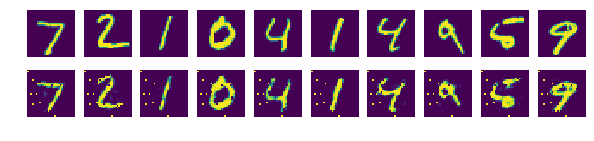

In [30]:
fig, ax = plt.subplots(2, sample_size, figsize = (sample_size, 2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
  ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
plt.show()